In [1]:
import xarray as xr
import pandas as pd
import numpy as np


# Dataframe

In [2]:
dailydata=xr.open_dataset(r'C:\Users\Harshit Jain\Desktop\delhiaq\daily_data.nc')
df=dailydata.to_dataframe()

df.columns = df.columns.str.lower()
df.rename(columns={'Date':'date','pm2.5':'pm25','ozone':'o3','tot-rf':'totrf'}, inplace=True)
df = df[df['station'] == 'Wazirpur, Delhi - DPCC'] 

print(df)


                      station       date   latitude  longitude        pm25  \
index                                                                        
13376  Wazirpur, Delhi - DPCC 2022-01-01  28.699793  77.165453  287.269231   
13377  Wazirpur, Delhi - DPCC 2022-01-02  28.699793  77.165453  307.791667   
13378  Wazirpur, Delhi - DPCC 2022-01-03  28.699793  77.165453  310.250000   
13379  Wazirpur, Delhi - DPCC 2022-01-04  28.699793  77.165453  301.187500   
13380  Wazirpur, Delhi - DPCC 2022-01-05  28.699793  77.165453  317.885417   
...                       ...        ...        ...        ...         ...   
13736  Wazirpur, Delhi - DPCC 2022-12-27  28.699793  77.165453  232.427083   
13737  Wazirpur, Delhi - DPCC 2022-12-28  28.699793  77.165453  182.781250   
13738  Wazirpur, Delhi - DPCC 2022-12-29  28.699793  77.165453  256.239583   
13739  Wazirpur, Delhi - DPCC 2022-12-30  28.699793  77.165453  325.378333   
13740  Wazirpur, Delhi - DPCC 2022-12-31  28.699793  77.165453  

# Rectified Calendar Plot

C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_21484\225578196.py:129: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_year = df[year].resample("1D").mean()
C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_21484\225578196.py:129: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df[year].resample("1D").mean()
C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_21484\225578196.py:193: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  cbar_ax = plt.subplot(grid[:, 3])


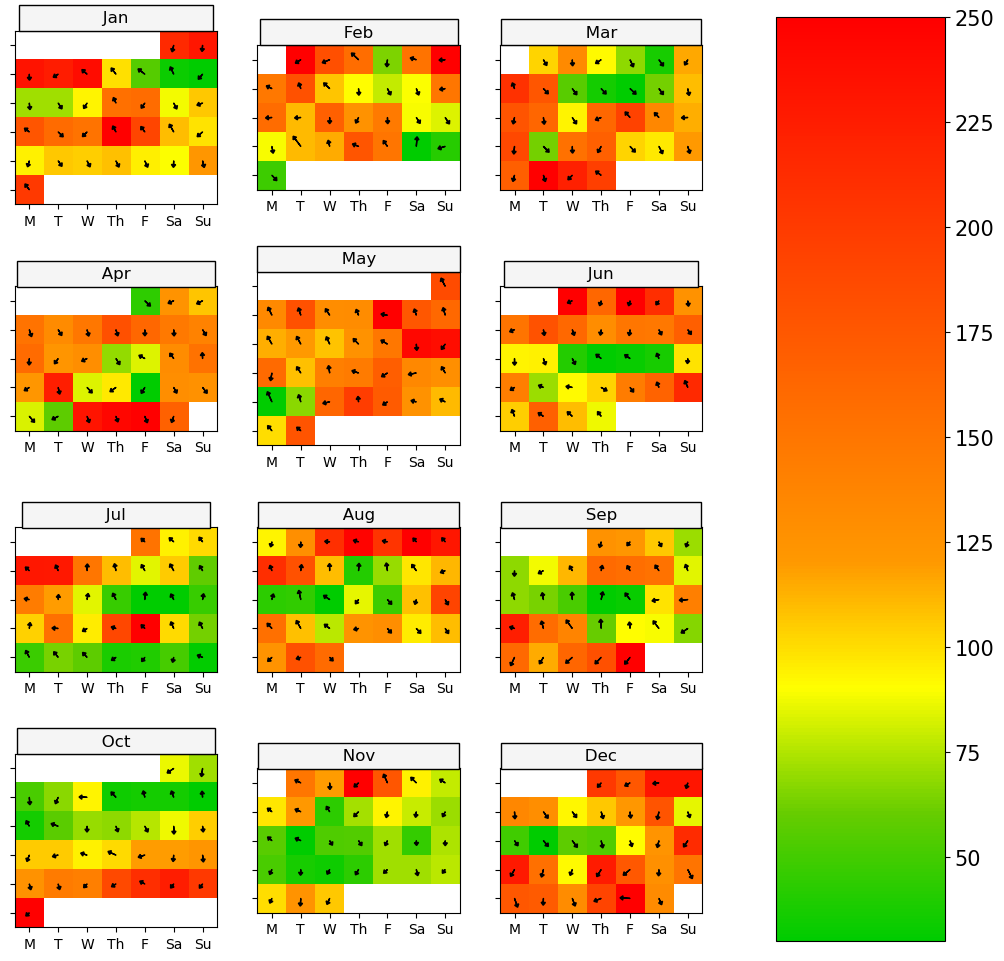

In [5]:
def calendarPlot(df, pollutant, year, country, **kwargs):
    """Shows daily concentrations laid out in a calendar format.

    Plots a heatmap on a calendar layout based 
    on the intensity of the pollutant per day.
    Each day contains an arrow indicating both 
    wind direction as well as wind speed.

    Parameters
    ----------
    df: pd.DataFrame
        minimally containing date and at least one other
        numeric variable
    pollutant: type string
        A pollutant name correspoinding to 
        a variable in a data frame, ex: 'pm25'
    year: type string
        Year to plot, for example, '2003'    
    cvals: numpy.ndarray
       array containing bin edges for the pollutant
    colors: numpy.ndarray
       array containing hex color codes corresponding to 
       bin edges for the pollutant

    """
    
    import datetime as dt
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import numpy as np
    import pandas as pd
    from numpy import array
    from utils import Legend
    import calendar

    cvals = Legend.country_pollutants[country][pollutant]["bin_edges"]
    colors = Legend.country_pollutants[country][pollutant]["color_scale"]

    norm = plt.Normalize(min(cvals), max(cvals))
    tuples = list(zip(map(norm, cvals), colors))
    cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

    def calendar_array(dates, data):
        """ creates the calendar array returning i,j giving
            positional values in the array
        """
        #print('datesss',dates)
        #print('dataaaaaaaa',data)
        i, j = zip(*[d.isocalendar()[1:] for d in dates])

        i = np.array(i) - min(i)
        
        k = []
        flag = 0
        for n in range(i.shape[0]):
            if i[n]>5:
                k.append(0)
                flag = 1
            else:
                if flag == 0:
                    k.append(i[n])
                else:
                    k.append(i[n]+1)
        i = np.array(k)
        
        #print('I',i)
        j = np.array(j) - 1
        #print('J',j)
        ni = max(i)+1
        #ni=7
        #print('NI',ni)

        calendar = np.nan * np.zeros((ni, 7))
        #calendar[i,j]=[0,0]
        calendar[i, j] = data
        #print(calendar[i, j])
#       
        
        #print('calendar',calendar[i,j])
        
        return i, j, calendar

    def calendar_heatmap(ax, dates, data):
        """ Sets heatmap information
        """
        i, j, calendar = calendar_array(dates, data)
        im = ax.imshow(calendar, interpolation="none", cmap=cmap)
        label_days(ax, dates, i, j, calendar)

    def label_days(ax, dates, i, j, calendar):
        """ Based on the day of the week, it will print that 
            text on each box of the day. The arrow is also ploted on
            each box for every day converting the given wind direction
            to a xy coordinate
        """
        ni, nj = calendar.shape
        day_of_month = np.nan * np.zeros((ni, 7))
        day_of_month[i, j] = [d.day for d in dates]
        #print(i,j)

        for (row, col), day in np.ndenumerate(day_of_month):
            if np.isfinite(day):
                ax.arrow(
                    col,
                    row,
                    avg_ws[int(day) - 1 + a]
                    * np.cos(avg_wd[int(day) - 1 + a] * np.pi / 180.0)
                    / 15.0,
                    -avg_ws[int(day) - 1 + a]
                    * np.sin(avg_wd[int(day) - 1 + a] * np.pi / 180.0)
                    / 15.0,
                    head_width=0.15,
                    head_length=0.1,
                    fc="k",
                    ec="k",
                )

        ax.set_yticklabels([])
        ax.set_xticks([0,1,2,3,4,5,6])
        ax.set_xticklabels(['M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'])

    # =============================================================================
    #     Cuts given data to show average of each day.
    #     Adds a month coloumn to the df as well
    # =============================================================================

    df.index = pd.to_datetime(df.date)
    df = df.drop("date", axis=1)
    df_year = df[year].resample("1D").mean()
    df_year["month"] = df_year.index.month
    df_year.index.dayofweek

    t = 1

    fig, ax = plt.subplots(figsize=(12, 12), nrows=4, ncols=4)

    # =============================================================================
    #     """ Plots 12 seperate plots that are then put togeather in a
    #         4x4 arrangement with the last column being used to plot
    #         the colorbar
    #     """
    # =============================================================================
    while t <= 12:
     

        avg_ws = []
        avg_wd = []
        avg_pm25 = []
        df_year_1 = df_year[df_year.month == t]
        avg_wd = df_year_1["wd"]
        avg_ws = df_year_1["ws"]
        avg_pm25 = df_year_1[pollutant]

        #i = 0
        a = 0
        b = len(avg_pm25)
       
        data = avg_pm25[a:b]
        num = len(data)
        
        start = dt.datetime(int(year), t, 1)
        dates = [start + dt.timedelta(days=i) for i in range(num)]

        month_labels = [
                "               Jan               ",
                "               Feb               ",
                "               Mar               ",
                "               Apr               ",
                "               May               ",
                "               Jun               ",
                "               Jul               ",
                "               Aug               ",
                "               Sep               ",
                "               Oct               ",
                "               Nov               ",
                "               Dec               ",
            ]
        ax[(t - 1) // 3][(t - 1) % 3].set_title(
                month_labels[t - 1], bbox=dict(facecolor="whitesmoke")
            )
        calendar_heatmap(ax[(t - 1) // 3][(t - 1) % 3], dates, data)
           # i = i + 1
        t = t + 1


    #plt.tight_layout()

    # =============================================================================
    #    Colorbar plotting
    # =============================================================================
    grid = plt.GridSpec(4, 4, wspace=0.5, hspace=0.5)
    
    cbar_ax = plt.subplot(grid[:, 3])
    cb1 = mpl.colorbar.ColorbarBase(
        cbar_ax, cmap=cmap, norm=norm, orientation="vertical"
    )
    cb1.ax.tick_params(labelsize=15)

    plt.show()
    #plt.close("all")

#df.dropna(subset=['pm25'],inplace=True)
calendarPlot(df, 'pm25', '2022','India')

In [8]:
#Identified Issue